### Description: Predicting Ethereum Price with Python and Machine Learning using Scikit-learn and Support Vector Regression

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [8]:
# Load the dataset
df = pd.read_csv('ethereum_2015-08-07_2024-06-02.csv')
df['Date'] = pd.to_datetime(df['Start'])
df.set_index('Date', inplace=True)

In [9]:

# Prepare features and target
future_days = 10
df['Future_Close'] = df['Close'].shift(-future_days)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']].values
y = df['Future_Close'].values

In [10]:




# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [11]:
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

# Initialize SVR model
svr = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Train the best model
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Mean Squared Error: 26610.155746845892
R² Score: 0.9677365528641804


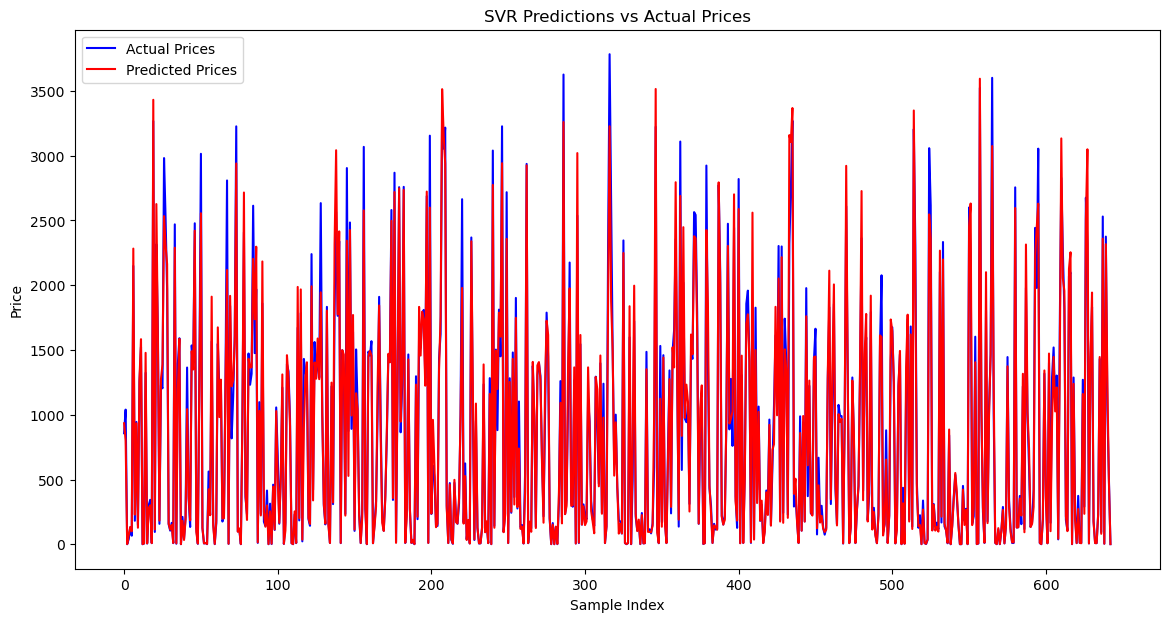

In [16]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices', color='b')
plt.plot(y_pred, label='Predicted Prices', color='r')
plt.title('SVR Predictions vs Actual Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()